In [700]:
# Import needed libraries 

import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv
from itertools import islice

In [701]:
# Load .env file

load_dotenv()

True

In [702]:
# Set Alpaca API key and secret passwords

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [703]:
# Initiate REST API

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [704]:
# Parameters for Stock Data from Alpacas
# Establish time frame (5 minute)

time_frame = "5min"

# Identify what stock symbol is trading

stock_symbol = "QQQ"

# Identify what start date to begin data analysis
# JAN 27 27 2021 GameStop event (GME) are we still doing this?

start_date = pd.Timestamp("2021-02-03", tz="America/New_York").isoformat()

# Identify what end date to finalize data analysis

end_date = pd.Timestamp("2021-02-04", tz="America/New_York").isoformat()

In [705]:
# Call stock data from identified period of time

stock_data = api.get_bars(
    stock_symbol, 
    time_frame, 
    start = start_date, 
    end = end_date
).df

In [706]:
# Displays the information pulled for working through code

stock_data.info()
display(stock_data.head())
display(stock_data.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2021-02-03 09:00:00+00:00 to 2021-02-04 00:55:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        192 non-null    float64
 1   high         192 non-null    float64
 2   low          192 non-null    float64
 3   trade_count  192 non-null    int64  
 4   open         192 non-null    float64
 5   volume       192 non-null    int64  
 6   vwap         192 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 12.0 KB


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-02-03 09:00:00+00:00,330.24,330.33,330.11,39,330.11,3383,330.227245
2021-02-03 09:05:00+00:00,329.92,330.22,329.88,38,330.22,5358,330.052469
2021-02-03 09:10:00+00:00,329.99,330.07,329.95,15,329.97,2615,329.999281
2021-02-03 09:15:00+00:00,329.91,329.91,329.75,20,329.89,1424,329.869747
2021-02-03 09:20:00+00:00,329.83,329.89,329.71,28,329.87,2871,329.788189


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-02-04 00:35:00+00:00,327.5200,327.56,327.46,36,327.55,9098,327.534268
2021-02-04 00:40:00+00:00,327.3900,327.44,327.39,33,327.43,6710,327.416061
2021-02-04 00:45:00+00:00,327.1100,327.42,327.11,65,327.42,10851,327.195534
2021-02-04 00:50:00+00:00,327.0499,327.20,327.03,112,327.12,35129,327.103756
2021-02-04 00:55:00+00:00,327.1000,327.11,327.07,44,327.10,10591,327.097768


In [707]:
# # Clean up DF keep Open, High, Low, Close, Volume (OHLCV)

# stock_data = stock_data.drop(columns=["trade_count", 'vwap'], axis=1)

# # Convert index

stock_data.head()

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-02-03 09:00:00+00:00,330.24,330.33,330.11,39,330.11,3383,330.227245
2021-02-03 09:05:00+00:00,329.92,330.22,329.88,38,330.22,5358,330.052469
2021-02-03 09:10:00+00:00,329.99,330.07,329.95,15,329.97,2615,329.999281
2021-02-03 09:15:00+00:00,329.91,329.91,329.75,20,329.89,1424,329.869747
2021-02-03 09:20:00+00:00,329.83,329.89,329.71,28,329.87,2871,329.788189


In [708]:
# Isolate closing prices to use for plotting stock data
#close = stock_data['close']

#print(close)

/Users/etienne/anaconda3/envs/machine_learning/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/etienne/anaconda3/envs/machine_learning/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/etienne/anaconda3/envs/machine_learning/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/etienne/anaconda3/envs/machine_learning/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


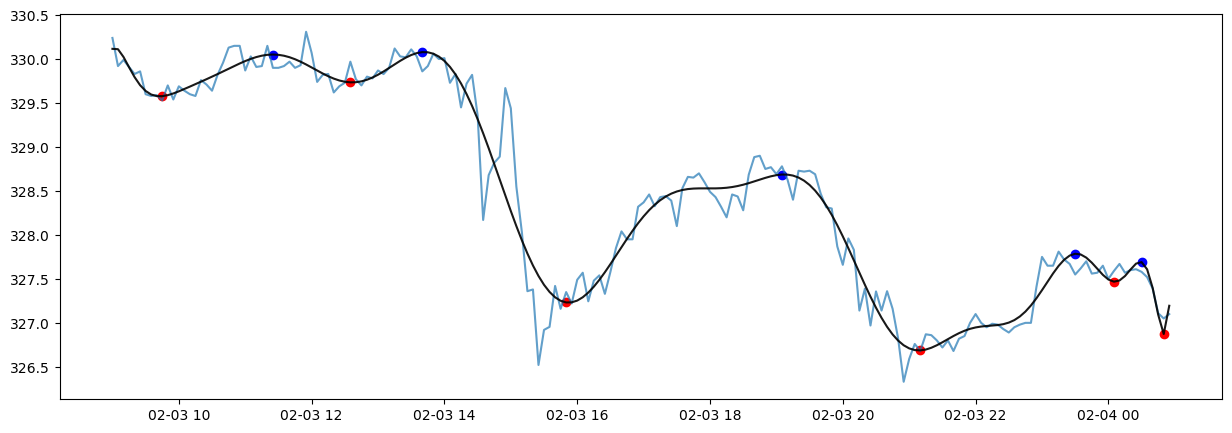

In [709]:
# Plot the stock data and identified minima

plt.figure(figsize=(15, 5))

# Establishes dimensions for x-axis

min_length = min(len(stock_data.index), len(stock_data['close']))
plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# ***Polynomial Fit***
# Establish the x-axis

x_data = np.arange(min_length)

# Identify degree of polynomial, this can be adjuster at a later date if needed

polynomial_degree = 25

# Calculate the polynomial coefficients to fit the stock data (OHLC)

polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

# Evaluate the polynomial for plotting (OHLC)

y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

# Review polynomial data

#print(len(y_polynomial_close))
#print(y_polynomial_close)

# Identify Local Extrema for polynomial fit data (minima and maxima)

local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]


# Plot polynomial fit

plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Plot red dots at local minima and blue dots at local maxima

plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

# # # Define parameters for double-bottom pattern detection
# y_delta = 0.03  # Adjust as needed
# threshold = lows.min() * 1.15

# # Identify potential double-bottom patterns
# # suspected_bottoms = []
# # suspected_tops = []
# # for index in local_poly_minima_df:
# #    avg_price = lows.iloc[max(0, index - 5): min(len(lows), index + 5)].mean()
# #    if lows.iloc[index] < threshold:
# #        suspected_bottoms.append(index)

# # # Plot the identified double-bottom patterns
# # plt.figure(figsize=(15, 5))
# # plt.plot(stock_data.index, lows, label='Low Prices', alpha=0.7)
# # plt.scatter(stock_data.index[suspected_bottoms], lows.iloc[suspected_bottoms], color='green', label='Double Bottoms')
# # plt.axhline(threshold, linestyle='--', color='blue', label='Threshold')
# # plt.title('Identified Double-Bottom Patterns')
# # plt.xlabel('Date')
# # plt.ylabel('Low Prices')
# # plt.legend()
# # plt.show()

In [710]:
# Convert the close price polynomial fit data into a dataframe
# This is done for OHLC poly fit data

poly_df = pd.DataFrame(y_polynomial_open)
columns = ['poly_fit_open']
poly_df.columns = columns
poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

poly_df.head()

,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close
0,330.097883,330.281823,330.012959,330.115964
1,330.140390,330.226858,330.031325,330.111952
2,330.088495,330.133016,329.938664,330.023604
3,329.992828,330.023308,329.813959,329.907104
4,329.885360,329.914182,329.699110,329.794745


In [711]:
# Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
# This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

updated_stock_data = stock_data.reset_index()
updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
updated_stock_data.head()


,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close
0,2021-02-03 09:00:00+00:00,330.24,330.33,330.11,39,330.11,3383,330.227245,330.097883,330.281823,330.012959,330.115964
1,2021-02-03 09:05:00+00:00,329.92,330.22,329.88,38,330.22,5358,330.052469,330.140390,330.226858,330.031325,330.111952
2,2021-02-03 09:10:00+00:00,329.99,330.07,329.95,15,329.97,2615,329.999281,330.088495,330.133016,329.938664,330.023604
3,2021-02-03 09:15:00+00:00,329.91,329.91,329.75,20,329.89,1424,329.869747,329.992828,330.023308,329.813959,329.907104
4,2021-02-03 09:20:00+00:00,329.83,329.89,329.71,28,329.87,2871,329.788189,329.885360,329.914182,329.699110,329.794745


In [712]:
# Add minima and maxima column to the DataFrame

#updated_stock_data[columns = {'minima',"maxima"}] = 0  # Initialize 'minima' column with zeros
updated_stock_data["minima"] = 0
updated_stock_data["maxima"] = 0
updated_stock_data.head()

# Mark rows with local minima as 1 in the 'minima' column
# Can we clean this up??? use one for loop with if statements?

for index in local_poly_minima:
    updated_stock_data.at[index, 'minima'] = -1

for index in local_poly_maxima:
    updated_stock_data.at[index, "maxima"] = 1

#updated_stock_data.head(50)

In [713]:
# Create Target Columns - Double Top Target & Double Bottom Target
updated_stock_data["dbl_top_target"] = 0
updated_stock_data["dbl_bot_target"] = 0

updated_stock_data.head()
updated_stock_data.tail()

,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
187,2021-02-04 00:35:00+00:00,327.5200,327.56,327.46,36,327.55,9098,327.534268,327.676504,327.706556,327.568233,327.608664,0,0,0,0
188,2021-02-04 00:40:00+00:00,327.3900,327.44,327.39,33,327.43,6710,327.416061,327.516633,327.547014,327.373933,327.397629,0,0,0,0
189,2021-02-04 00:45:00+00:00,327.1100,327.42,327.11,65,327.42,10851,327.195534,327.248810,327.279112,327.095084,327.092656,0,0,0,0
190,2021-02-04 00:50:00+00:00,327.0499,327.20,327.03,112,327.12,35129,327.103756,327.010996,327.040443,326.888485,326.873335,-1,0,0,0
191,2021-02-04 00:55:00+00:00,327.1000,327.11,327.07,44,327.10,10591,327.097768,327.187333,327.213950,327.147026,327.194371,0,0,0,0


In [714]:
# Define the time independent DF for double top/bottom identification
# Timestamp remains a column, but can identify pattern from peak to peak immediately

time_independent_df = []
time_independent_df = pd.DataFrame(time_independent_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

for index, row in islice(updated_stock_data.iterrows(), 0, None):

    # Assign to rows only those that contain local min or max

    if (updated_stock_data.at[index,"minima"] == -1):
        time_independent_df.loc[index] = row
        a = updated_stock_data.iloc[index]["poly_fit_close"]
    elif (updated_stock_data.at[index,"maxima"] == 1):
        time_independent_df.loc[index] = row
        a = updated_stock_data.iloc[index]["poly_fit_close"]

# Reset time dependent index
# Set new time independent index

time_independent_df.reset_index(inplace = True)
time_independent_df.rename(columns={"index":"time_dependent_index"}, inplace = True)

# Data review
        
display(time_independent_df.head(20))
print()
print(row)
print()
print(a)
print(index)
print()
print(len(time_independent_df))

,time_dependent_index,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
0,9,2021-02-03 09:45:00+00:00,329.53,329.59,329.53,7,329.59,1340,329.585634,329.566023,329.619178,329.530939,329.577699,-1,0,0,0
1,29,2021-02-03 11:25:00+00:00,329.9,329.93,329.9,5,329.93,243,329.924033,330.041262,330.080421,330.047165,330.051416,0,1,0,0
2,43,2021-02-03 12:35:00+00:00,329.97,330.02,329.77,152,329.81,20300,329.86195,329.766898,329.92153,329.494179,329.735008,-1,0,0,0
3,56,2021-02-03 13:40:00+00:00,329.86,330.01,329.8,106,330.01,15890,329.866336,330.082978,330.171855,329.897661,330.078623,0,1,0,0
4,82,2021-02-03 15:50:00+00:00,327.35,327.71,326.7,3663,327.16,335504,327.173438,327.272609,327.622303,326.893016,327.232113,-1,0,0,0
5,121,2021-02-03 19:05:00+00:00,328.78,328.889,328.6901,1414,328.73,313952,328.087416,328.685,328.773032,328.581914,328.686655,0,1,0,0
6,146,2021-02-03 21:10:00+00:00,326.68,326.82,326.4003,382,326.78,538365,326.47312,326.685128,326.856217,326.507026,326.686811,-1,0,0,0
7,174,2021-02-03 23:30:00+00:00,327.55,327.61,327.41,51,327.61,4130,327.468116,327.775167,327.834528,327.672766,327.785769,0,1,0,0
8,181,2021-02-04 00:05:00+00:00,327.59,327.6,327.51,9,327.6,1150,327.555217,327.478484,327.50006,327.434948,327.468362,-1,0,0,0
9,186,2021-02-04 00:30:00+00:00,327.58,327.64,327.56,21,327.56,5335,327.59629,327.715023,327.744457,327.646522,327.690794,0,1,0,0



timestamp         2021-02-04 00:55:00+00:00
close                                 327.1
high                                 327.11
low                                  327.07
trade_count                              44
open                                  327.1
volume                                10591
vwap                             327.097768
poly_fit_open                    327.187333
poly_fit_high                     327.21395
poly_fit_low                     327.147026
poly_fit_close                   327.194371
minima                                    0
maxima                                    0
dbl_top_target                            0
dbl_bot_target                            0
Name: 191, dtype: object

326.8733353481356
191

11


In [715]:
# Initialize variables to identify double top/bottom patterns
# Time dependent variable x_0 will always begin at a local min/max which also coincides
# With the start of a trend into a potential double top/bottom
    
x_0 = 0

# Initiation of double top/bottom variable
    
a = 0

# First peak/valley of double top/bottom pattern
    
b = 0

# Trough/peak of double top/bottom pattern

c = 0

# Second peak/vallye of double top/bottom pattern
    
d = 0

# Trigger of double top/bottom pattern
    
e = 0

# Final time increment to finalize and trigger double top signal
    
x_f_min = 0
x_f_max = 0

In [716]:
# Read through code to identify double top/bottom and assign to target columns.

for index, row in islice(time_independent_df.iterrows(), 0, len(time_independent_df) - 4):

    # Check for double top
    # If found then assigns x_f final time for writing to targets in time dependent dataframe

    if (time_independent_df.at[index,"minima"] == -1):
        a = time_independent_df.iloc[index]["poly_fit_close"]
        b = time_independent_df.iloc[index + 1]["poly_fit_close"]
        c = time_independent_df.iloc[index + 2]["poly_fit_close"]
        d = time_independent_df.iloc[index + 3]["poly_fit_close"]
        e = time_independent_df.iloc[index + 4]["poly_fit_close"]
        x_0 = time_independent_df.iloc[index]["time_dependent_index"]
        print(a)
        print(b)
        print(c)
        print(d)
        print(e)
        if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e < c):
            x_f_max = time_independent_df.iloc[index + 4]["time_dependent_index"]
            break

    # Check for double bottom
    # If found then assigns x_f final time for writing to targets in time dependent dataframe
            
    elif (time_independent_df.at[index,"maxima"] == 1):
        a = time_independent_df.iloc[index]["poly_fit_close"]
        b = time_independent_df.iloc[index + 1]["poly_fit_close"]
        c = time_independent_df.iloc[index + 2]["poly_fit_close"]
        d = time_independent_df.iloc[index + 3]["poly_fit_close"]
        e = time_independent_df.iloc[index + 4]["poly_fit_close"]
        x_0 = time_independent_df.iloc[index]["time_dependent_index"] 
        print(a)
        if (time_independent_df.iloc[index+1]["poly_fit_low"] < d < time_independent_df.iloc[index+1]["poly_fit_high"]) and (e > c):
            x_f_min = time_independent_df.iloc[index + 4]["time_independent_df"]
            break

print(x_0)
print(x_f_max)
print(x_f_min)

329.57769945504486
330.05141635926117
329.73500792188617
330.0786234889414
327.23211328897736
9
82
0


In [733]:
# Write data to target in time dependent DF

time = x_0
print(time)
while (time < x_f_max + 1):
    updated_stock_data.at[time, "dbl_top_target"] = 1
    time = time + 1

print(updated_stock_data.loc[82])

9
timestamp         2021-02-03 15:50:00+00:00
close                                327.35
high                                 327.71
low                                   326.7
trade_count                            3663
open                                 327.16
volume                               335504
vwap                             327.173438
poly_fit_open                    327.272609
poly_fit_high                    327.622303
poly_fit_low                     326.893016
poly_fit_close                   327.232113
minima                                   -1
maxima                                    0
dbl_top_target                            1
dbl_bot_target                            0
Name: 82, dtype: object
